
## 01 — Амплитудная модуляция
В данном примере будет рассмотрена модуляция  сигнала в диапазон промежуточной частоты или радиочастоты для передачи, а также показано, как этот исходный сигнал можно идеально восстановить в приемнике с помощью демодуляции. На первом этапе будет рассмотрен простой пример амплитудной модуляции и демодуляции, в частности мат.аппарат, а сигналы будут отображены для визуализации как во временной, так и в частотной областях, чтобы понять каждый этап процесса.




## 1. Введение <a class="anchor" id="introduction"></a>

Модулирование (или смешивание) — это процесс объединения двух сигналов путем умножения. Модуляция – это сдвиг информационного сигнала в выделенную полосу частот. Демодуляция — это обратный процесс, при котором информация преобразуется обратно в основной диапазон. Этот процесс показан на рисунке 1.

<figure>
<img src='./images/modulation.svg' height='50%' width='50%'/>
    <figcaption><b>Figure 1: Overview of modulation and demodulation.</b></figcaption>
</figure>


В передатчике сигнал основной полосы может быть модулирован или смешан с несущей частотой, которая обычно может находиться в диапазоне от 10 МГц до нескольких ГГц. В приемнике этот модулированный сигнал может быть демодулирован или микширован из несущей частоты обратно в основной диапазон.

Далее будут представлены необходимые шаги с использованием простой амплитудной модуляции. В следующем [примере]() представлена схема квадратурной амплитудной модуляции (QAM), используемая во многих современных системах радиосвязи.


## 2. Амплитудная модуляция и демодуляция <a class="anchor" id="amplitude_modulation"></a>

Амплитудная модуляция — это процесс модификации одного сигнала другим посредством изменения амплитуды сигнала. 

 Примера состоит из описаний, диаграмм, ячеек кода и графиков, которые проведут вас через процесс модуляции модулирующего сигнала в RF, передачи сигнала, приема и демодуляции. Также показано, как можно восстановить групповой сигнал после передачи по радиочастоте.

На первом этапе необходимо импортировать нужные библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Амплитудная модуляция <a class="anchor" id="mod"></a>

Схема радиочастотного передатчика представлена на рисунке 2.

<figure>
<img src='./images/amplitude_modulation.svg' height='60%' width='60%'/>
    <figcaption><b>Figure 2: Amplitude modulation of a baseband signal.</b></figcaption>
</figure>


Прежде всего определены основные параметры. ВЧ АЦП первого поколения имеют частоту дискретизации 4096 МГц, поэтому в этом упражнении мы смоделируем ее. Мы выбираем $f_{s}$ = 4096 МГц и входной сигнал основной полосы частот $f_{b}$ = 64 МГц.

In [2]:
# задание параметров
fs = 4096e6 # sample rate
fb = 64e6 # frequency of baseband signal
A = 2 # baseband signal amplitude
N_fft = 2048 # fft size

t = np.arange(N_fft)/fs #time scale

Определим входной сигнал, $g(t)$, как

$$
g(t) = A\cos(2 \pi f_{b} t),
$$

где A — амплитуда, а $f_{b}$ — частота модулирующего сигнала.

В демонстрационных целях в этом примере будет используется однотональный сигнал. Однако типичный групповой сигнал с частотными компонентами от 0 до $f_{b}$ можно модулировать с помощью того же подхода.

In [3]:
# входной сигнал
g = A*np.cos(2*np.pi*fb*t) 

Далее необходимо вычислить БПФ сигнала для построения графика в частотной области.

In [4]:
# вычисление БПФ
g_fft_result = np.fft.fft(g, N_fft)

# получаем соответсвие частот
freqs = np.fft.fftfreq(N_fft,1/fs)


Этот информационный сигнал основной полосы частот может быть отображен как во временной, так и в частотной области.

Мы можем наблюдать косинус с амплитудой $A$ во временной области и одиночный тон $f_{b}$ в частотной области.

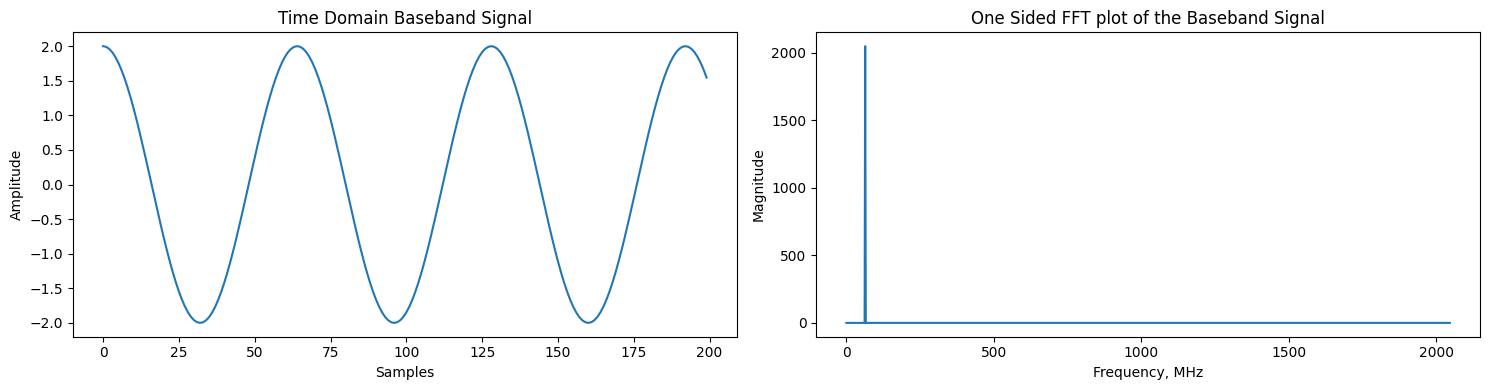

In [5]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(g[:200])
axs[0].set_title('Time Domain Baseband Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Baseband Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Аналогичным образом может быть определен высокочастотный сигнал несущей. Этот сигнал имеет более высокую частоту, которая используется для модуляции информационного сигнала в желаемом диапазоне.

$$
c(t) = \cos(2 \pi f_{c} t)
$$

In [6]:
fc = 1400e6 # несущая частота

# формирование сигнала
c = np.cos(2*np.pi*fc*t) 

In [7]:
# Вычисление БПФ
c_fft_result = np.fft.fft(c, N_fft)


Теперь мы можем построить этот несущий сигнал во временной и частотной областях. 

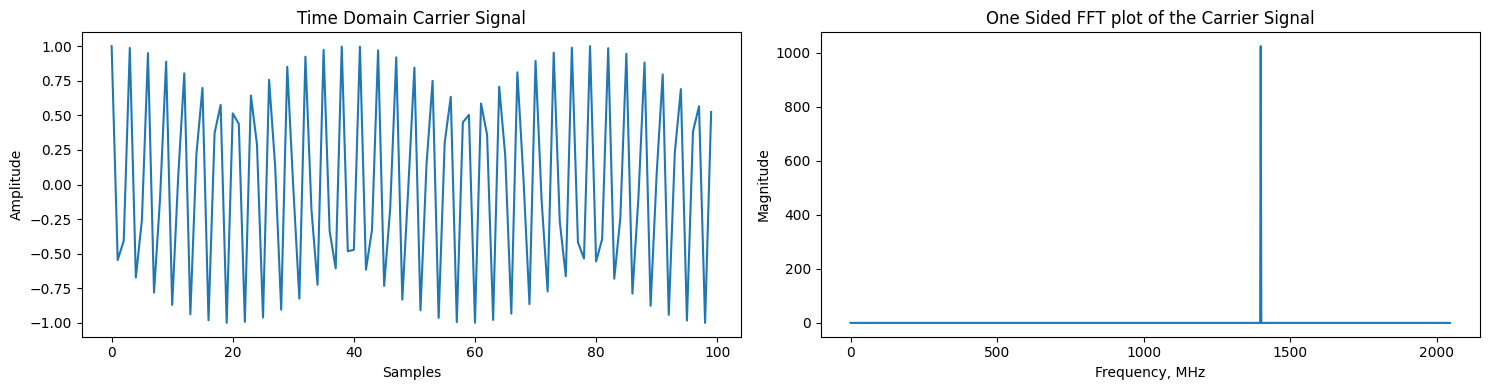

In [8]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(c[:100])
axs[0].set_title('Time Domain Carrier Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(c_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Carrier Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Модулированный сигнал $s(t)$ теперь можно получить умножением нашего информационного сигнала $g(t)$ на сигнал несущей $c(t)$.

$$
s(t) = c(t) \times g(t)
$$

$$
s(t) = \cos(2 \pi f_{c} t) \times A\cos(2 \pi f_{b} t)
$$

Применяя тригонометрические формулы:

$$
s(t) = \frac{A}{2} \cos(2 \pi (f_{c} - f_{b}) t) + \frac{A}{2} \cos(2 \pi (f_{c} + f_{b}) t).
$$


In [9]:
# Find Modulated Signal
s = g*c # Information signal, g(t), multiplied by carrier signal, c(t).

In [10]:
# Find FFT of Modulated Signal
s_fft_result = np.fft.fft(s, N_fft)

Мы можем построить результаты этой модуляции во временной и частотной областях.

Частотные составляющие можно увидеть в точках $f_{c} - f_{b}$ и $f_{c} + f_{b}$. Следовательно, полоса пропускания, занимаемая передаваемым сигналом, равна $2 f_{b}$

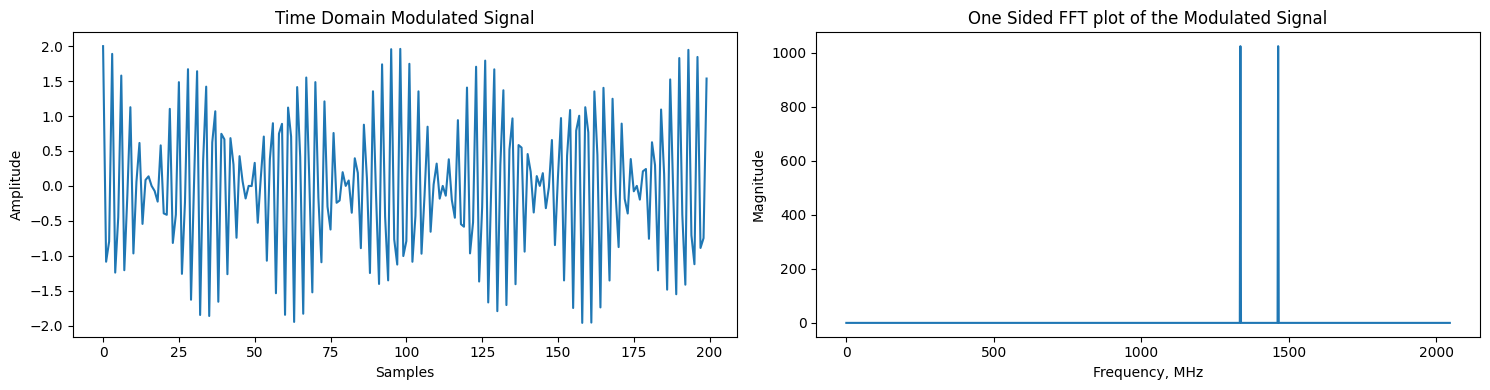

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(s[:200])
axs[0].set_title('Time Domain Modulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(s_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

## 4. Демодуляция <a class="anchor" id="demod"></a>

В приемнике модулированный сигнал может быть «идеально» демодулирован с использованием гетеродина, который соответствует несущей передатчика. Конструкцию радиочастотного приемника можно увидеть на рисунке 3.

<figure>
<img src='./images/amplitude_demodulation.svg' height='60%' width='60%'/>
    <figcaption><b>Figure 3: Amplitude Demodulation of a Baseband Signal</b></figcaption>
</figure>

Демодуляцию можно рассматривать как процесс, обратный модуляции. Модулированный сигнал $s(t)$ умножается на сигнал несущей $c(t)$, чтобы получить демодулированный сигнал $x(t)$. В идеальном сценарии несущая сигнала приемника будет эквивалентна $c_{t}$ в передатчике.

$$
x(t) = c(t) \times s(t)
$$

Это соотношение правильно восстанавливает входной сигнал. Однако нежелательные высокочастотные компоненты остаются кратными $f_{c}$..

$$x(t) = \frac{A}{2} \cos(2 \pi f_{b} t) + \frac{A}{4} \cos(2 \pi (2f_{c} - f_{b}) t) + \frac{A}{4} \cos(2 \pi (2f_{c} + f_{b}) t)$$



In [12]:
# Find Demodulated Signal
x = c*s # умножение несущего и принимаемых сигналов для выполнения демодуляции

In [13]:
# Аналогично БПФ для сигнала демодуляции 
x_fft_result = np.fft.fft(x, N_fft)


Этот демодулированный сигнал теперь можно отобразить во временной и частотной областях.


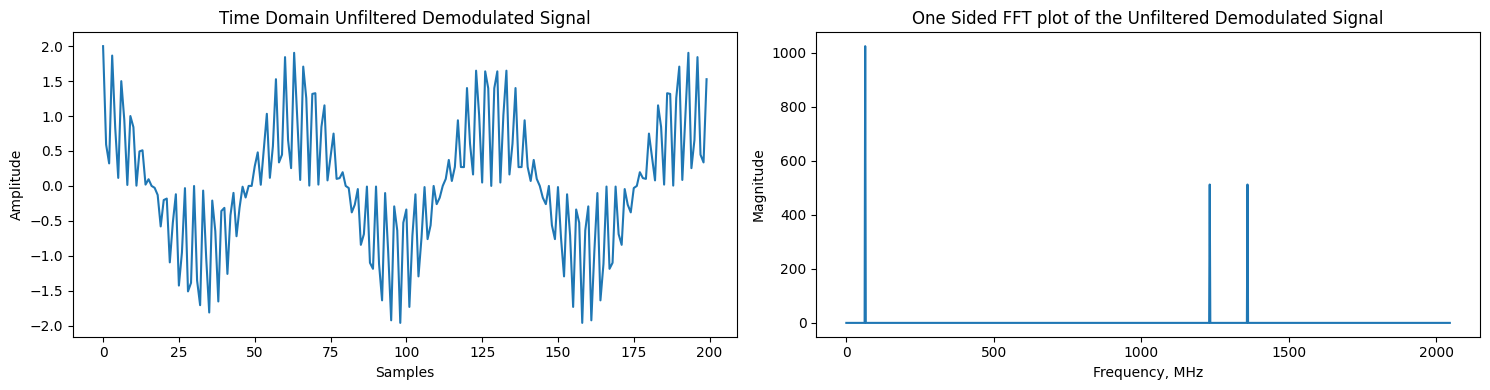

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(x[:200])
axs[0].set_title('Time Domain Unfiltered Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(x_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Unfiltered Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Мы видим, что исходный информационный сигнал в $f_{b}$ был успешно восстановлен. Однако нежелательные высокочастотные компоненты, находящиеся в $2f_{c} - f_{b}$ и $2f_{c} + f_{b}$, присутствуют.

Эти компоненты можно удалить с помощью фильтра нижних частот, который можно спроектировать с использованием оконного метода. Этот подход просто формирует идеальную импульсную характеристику $h_d(n)$, умножая ее на оконную функцию $w(n)$, как показано ниже.

$$
h(n) = w(n).h_d(n)
$$

In [15]:
f_cutoff = 0.1 # частота среза
b = 0.08  

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # вычисличение фильтра
w = np.blackman(N) # Окно вычисления Блэкмана.
h = h * w 
h = h / np.sum(h) # нормализация для единичного усиления

Фильтр нижних частот можно применить к демодулированному сигналу с помощью свертки. В Python эту операцию можно выполнить просто с помощью np.convolve().

In [16]:
u = np.convolve(x, h)

Результаты работы этого фильтра нижних частот можно отобразить рядом с нефильтрованным сигналом.

В частотной области мы ясно видим, что высокочастотные компоненты удаляются, остается только желаемый групповой сигнал.

При удалении высокочастотных компонентов желаемый результат можно получить как:

$$
u(t) = \frac{A}{2} \cos(2 \pi f_{b} t).
$$

In [17]:
u_fft_result = np.fft.fft(u, N_fft)

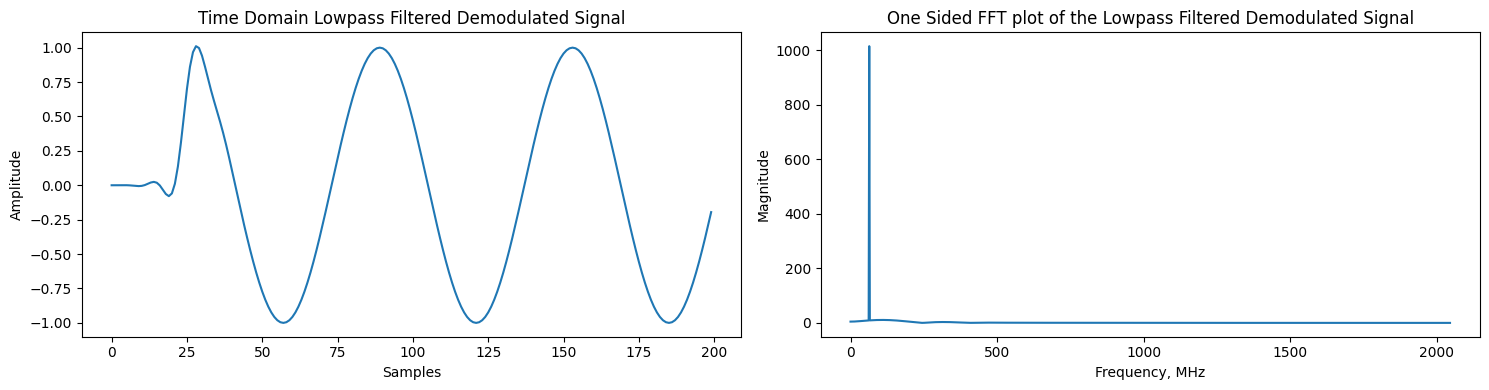

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(u[:200])
axs[0].set_title('Time Domain Lowpass Filtered Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(u_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass Filtered Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

## 5. Фазовая ошибка <a class="anchor" id="phase_error"></a>

Если гетеродин не находится точно в фазе с принимаемым сигналом, результирующая фазовая ошибка приведет к затуханию в $\cos(\theta)$, как показано ниже.

$$
\cos(2 \pi f_{b} t + \theta)
$$

In [19]:
# Find phaseshifted local carrier
phaseshift = (np.pi/3) #вносим фазовый сдвиг
phase_carrier = np.cos(2*np.pi*fc*t + phaseshift) # Применить фазовый сдвиг к несущей

# Найдем демодулированный сигнал, используя новую несущую. Модулированный сигнал остается таким же, как и раньше.
phase_demodulation = phase_carrier*s # сигнал 

# применение ФНЧ
lp_phaseshift = np.convolve(phase_demodulation, h)

Эту концепцию можно продемонстрировать, снова построив демодулированный сигнал с фильтрацией нижних частот, но включив фазовую ошибку в сигнал несущей.

Используя фазовую ошибку $\frac{\pi}{3}$, мы наблюдаем затухание $\cos(\frac{\pi}{3}) = 0,5.$

Следовательно, во временной области мы можем наблюдать амплитуду $\frac{A}{4}$ по сравнению с передаваемым сигналом.

In [20]:
# Find PhaseShifted FFT Signal
phaseshift_fft_result = np.fft.fft(lp_phaseshift, N_fft)

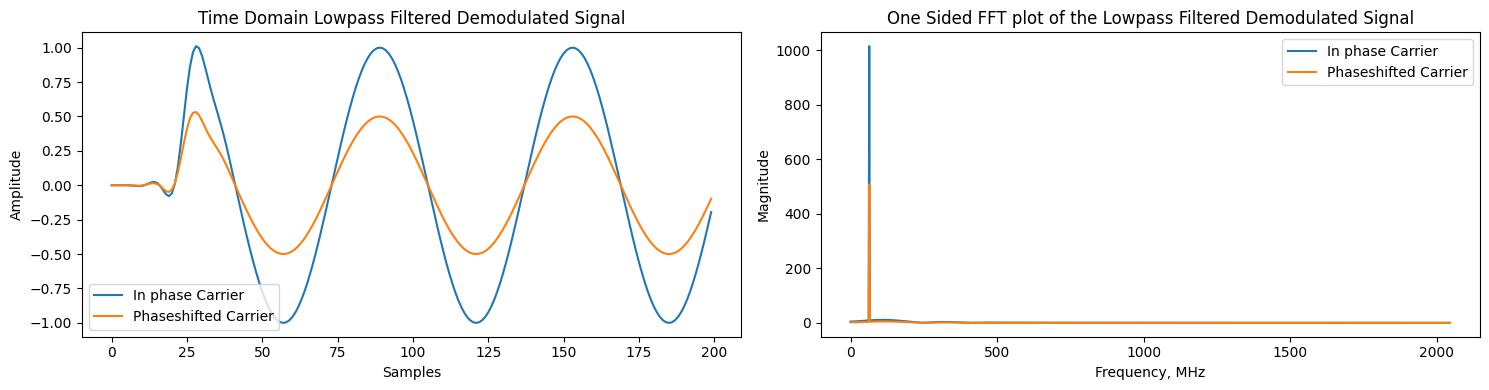

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(u[:200])
axs[0].plot(lp_phaseshift[:200])
axs[0].set_title('Time Domain Lowpass Filtered Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('In phase Carrier', 'Phaseshifted Carrier'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(u_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(phaseshift_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass Filtered Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('In phase Carrier', 'Phaseshifted Carrier'))
fig.tight_layout()

## 6. Вывод <a class="anchor" id="conclusion"></a>

Таким образом показано, как можно использовать амплитудную модуляцию для передачи группового сигнала на гораздо более высоких частотах, сохраняя при этом возможность воссоздать исходный сигнал на приемнике. Однако существует проблема спектральной неэффективности: ширина основной полосы составляет $f_{b}$ Гц, а модулированный сигнал — $2f_{b}$
Поэтому для передачи сигнала нам требуется удвоенная полоса пропускания.

Эту проблему можно решить с помощью схем модуляции QAM, описанных в следующей тетради.